## Sample using the trained weights

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import argparse
import pickle 
import os
from torch.autograd import Variable 
from torchvision import transforms 
from build_vocab import Vocabulary
from model import EncoderCNN, DecoderRNN
from PIL import Image

In [2]:
def to_var(x, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, volatile=volatile)

def load_image(image_path, transform=None):
    image = Image.open(image_path)
    image = image.resize([224, 224], Image.LANCZOS)
    
    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image
    
def main(sample_times):
    image = Image.open(image_url)
    plt.imshow(np.asarray(image))
    plt.show()
    
    # Image preprocessing
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    
    # Load vocabulary wrapper
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)

    # Build Models
    encoder = EncoderCNN(embed_size)
    encoder.eval()  # evaluation mode (BN uses moving mean/variance)
    decoder = DecoderRNN(embed_size, hidden_size, 
                         len(vocab), num_layers)
    

    # Load the trained model parameters
    encoder.load_state_dict(torch.load(encoder_path))
    decoder.load_state_dict(torch.load(decoder_path))

    # Prepare Image
    image = load_image(image_url, transform)
    image_tensor = to_var(image, volatile=True)
    
    # If use gpu
    if torch.cuda.is_available():
        encoder.cuda()
        decoder.cuda()
    
    # Generate caption from image
    feature = encoder(image_tensor)
    for i in range(sample_times):
        sampled_ids = decoder.sample(feature)
        sampled_ids = sampled_ids.cpu().data.numpy()

        # Decode word_ids to words
        sampled_caption = []
        for word_id in sampled_ids:
            word = vocab.idx2word[word_id]
            sampled_caption.append(word)
            if word == '<end>':
                break
        sentence = ' '.join(sampled_caption)
    
        # Print out image and generated caption.
        print (sentence)


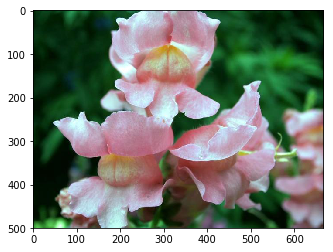

it ring onto small cone-shaped maroon a shapes think edges cone-shaped head notch hot mottled designs peddles through brightly hard
bigger three lilac 5 vivid whitish redish covered soft concentrically golden hundreds stripes cross-like cupped behind ) body fairly purple/pink
lots furry tight groupings trumpet-like orientation ending disc glossy clusters bold mustard hard funnel encompassing extremely corolla egg else grouping
[ brownish fuzzy against fire distinguish ray-like elsewhere completely sun interesting easy if round-edged central features ; curves magenta open
is gray gives multitude tan floating slight spherical sepal crimson trumpet-shaped pointing protrusions closed patterns single broad combination overlapping warm


In [4]:
image_url = '../flowers_processed/test_imgs/image_03116_1.jpg'
encoder_path = './trained_weights/trainEstOnly/encoder-1-200.pkl'
decoder_path = './trained_weights/trainEstOnly/decoder-1-200.pkl'
vocab_path = '/zf18/fz2ds/Text2Image/Text2ImageGenerateModel/flowers_processed/vocab.pkl'

embed_size = 512
hidden_size = 512
num_layers = 1

main(5)